### Growing a Decision Tree
- Decision Tree를 성장(만드는)시키는 알고리즘이 필요
- <b>어떻게 하면 가장 분기(branch)를 잘 만들 수 있는가?</b>
- Data의 attribute를 기준으로 branch 생성
- <b>어떤 attribute를 기준으로 할 때 가장 Entropy가 작은가?</b>
- 하나를 자른 후에 그 다음은 어떻게 할 것인가?

---

- Decision Tree는 재귀적으로 생김
- "대상 라벨에 대해 어떤 attribute가 더 <b>확실한 정보</b>를 제공하고 있는가?"로 branch attribute를 선택
- 확실한 정보의 선택 기준은 알고리즘별로 차이가 남
- Tree 생성 후 <b>pruning을 통해 Tree generalization 시행</b>
- 일반적으로 효율을 위해 <b>Binary Tree</b>를 사용

### Decision Tree의 특징
- 비교적 간단하고 직관적으로 결과를 표현
- 훈련시간이 길고, 메모리 공간을 많이 사용함
- Top-down, Recursive, Divide and Conquer 기법
- Greedy 알고리즘 → 부분 최적화

### Decision Tree의 장점
- 트리의 상단 부분 attribute들이 가장 중요한 예측변수 → attribute 선택 기법으로도 활용할 수 있음
- Attribute의 <b>scaling이 필요없음</b>
- 관측치의 절대값이 아닌 <b>순서</b>가 중요 → Outlier에 이점
- 자동적 변수 부분선택 ← Tree pruning

### Algorithms of Decision Tree
- 크게 2가지 형태의 decision tree 알고리즘 존재
- 알고리즘별 attribute branch 방법이 다름
- ⓵ ID3 기반의 C4.5(Ross Quinlan) → Entropy <b>⓶ CART(Classification And Regression Tree)</b> → Gini
- <b>CART 알고리즘이 일반적으로 더 많이 사용됨!</b>
- 연속형 변수를 위한 regression tree도 존재

### Information Gain
- <b>Entropy 함수를 도입하여 branch splitting</b>
- <b>Information Gain</b> : <b>Entropy</b>를 사용하여 속성별 분류 시 <b>Impurity(복잡도)를 측정</b>하는 지표
- <b>Information Gain(= 전체 Entropy - 속성별 Entropy)</b>로 <b>속성별 Information Gain</b>을 계산함
- <b>속성별 Entropy가 낮은 것을 attribute로 선택하여 branch splitting!!</b>
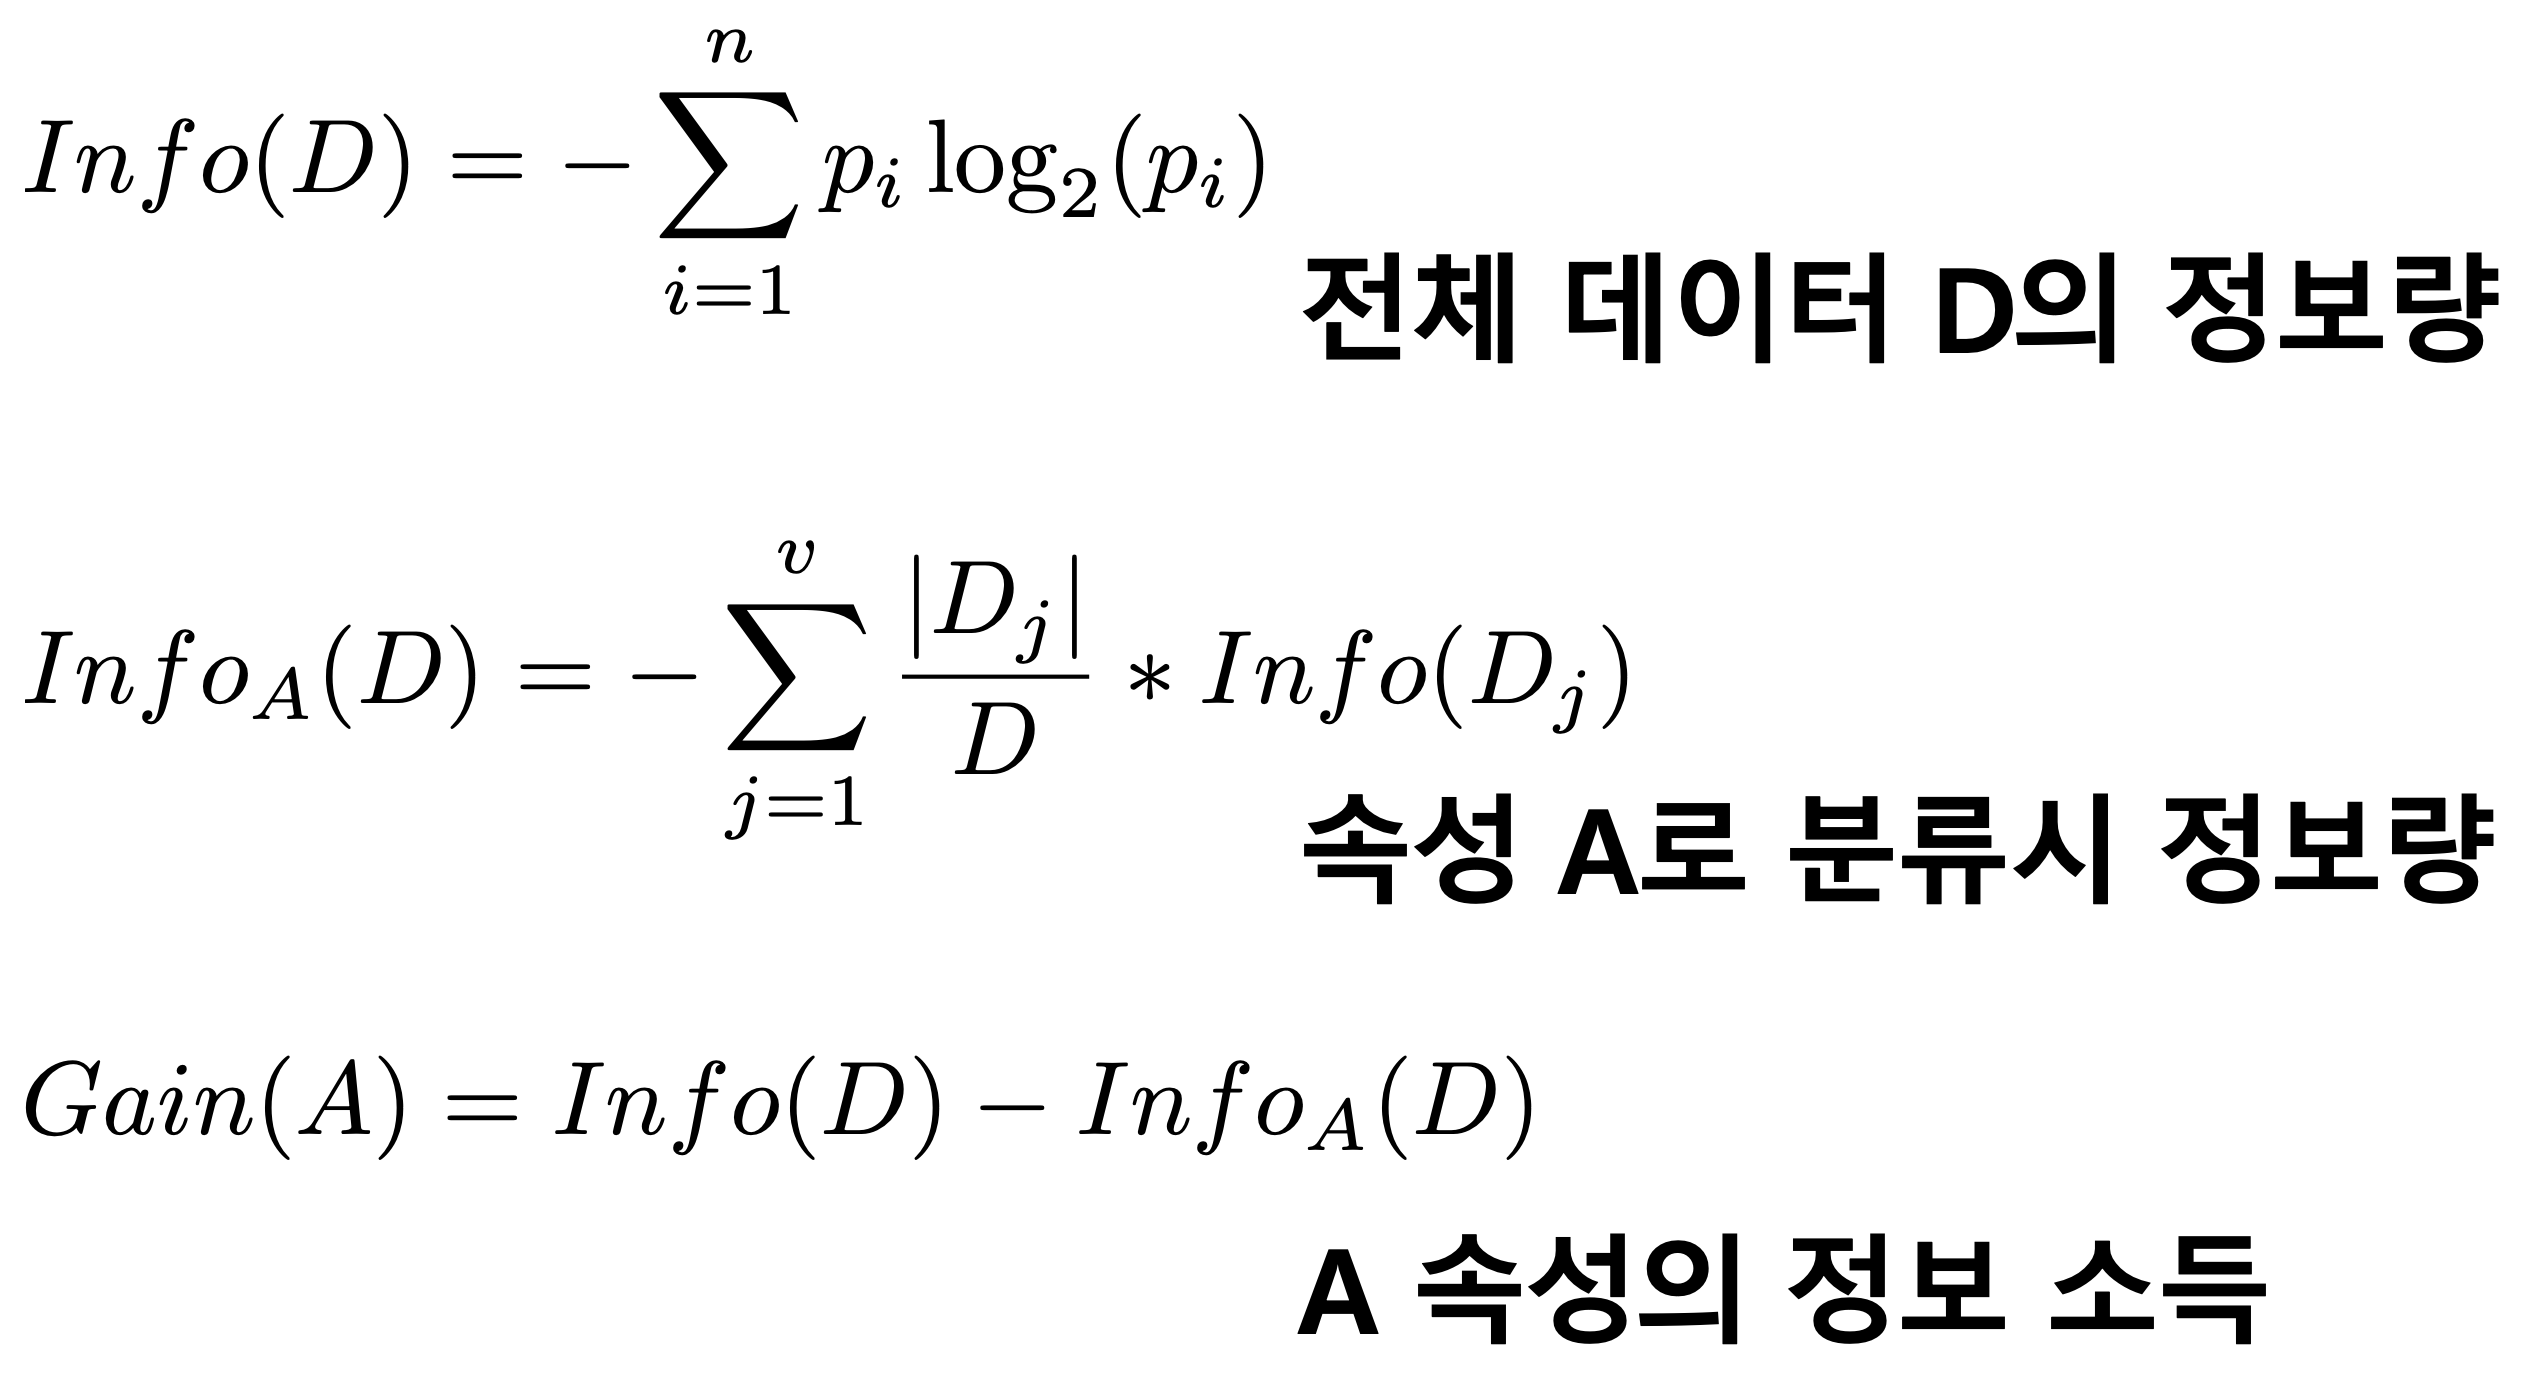
- Info(D)는 전체 Entropy를 구하는 식
- Info<sub>A</sub>(D)는 속성이 A일 때 Entropy로, j는 label을 의미하고 |D<sub>j</sub>|/|D|는 가중치를 의미함
    - 참고로, 여기서 데이터는 Categorical Data
    - 즉, Attribute는 feature(변수)이고, 각 Attribute에 대한 True, False 혹은 low, medium, high와 같은 categorical data가 있는 것!
- <b>속성별 Entropy가 가장 낮은 값 = Gain(A)가 가장 높은 값</b>

### ID3 Process
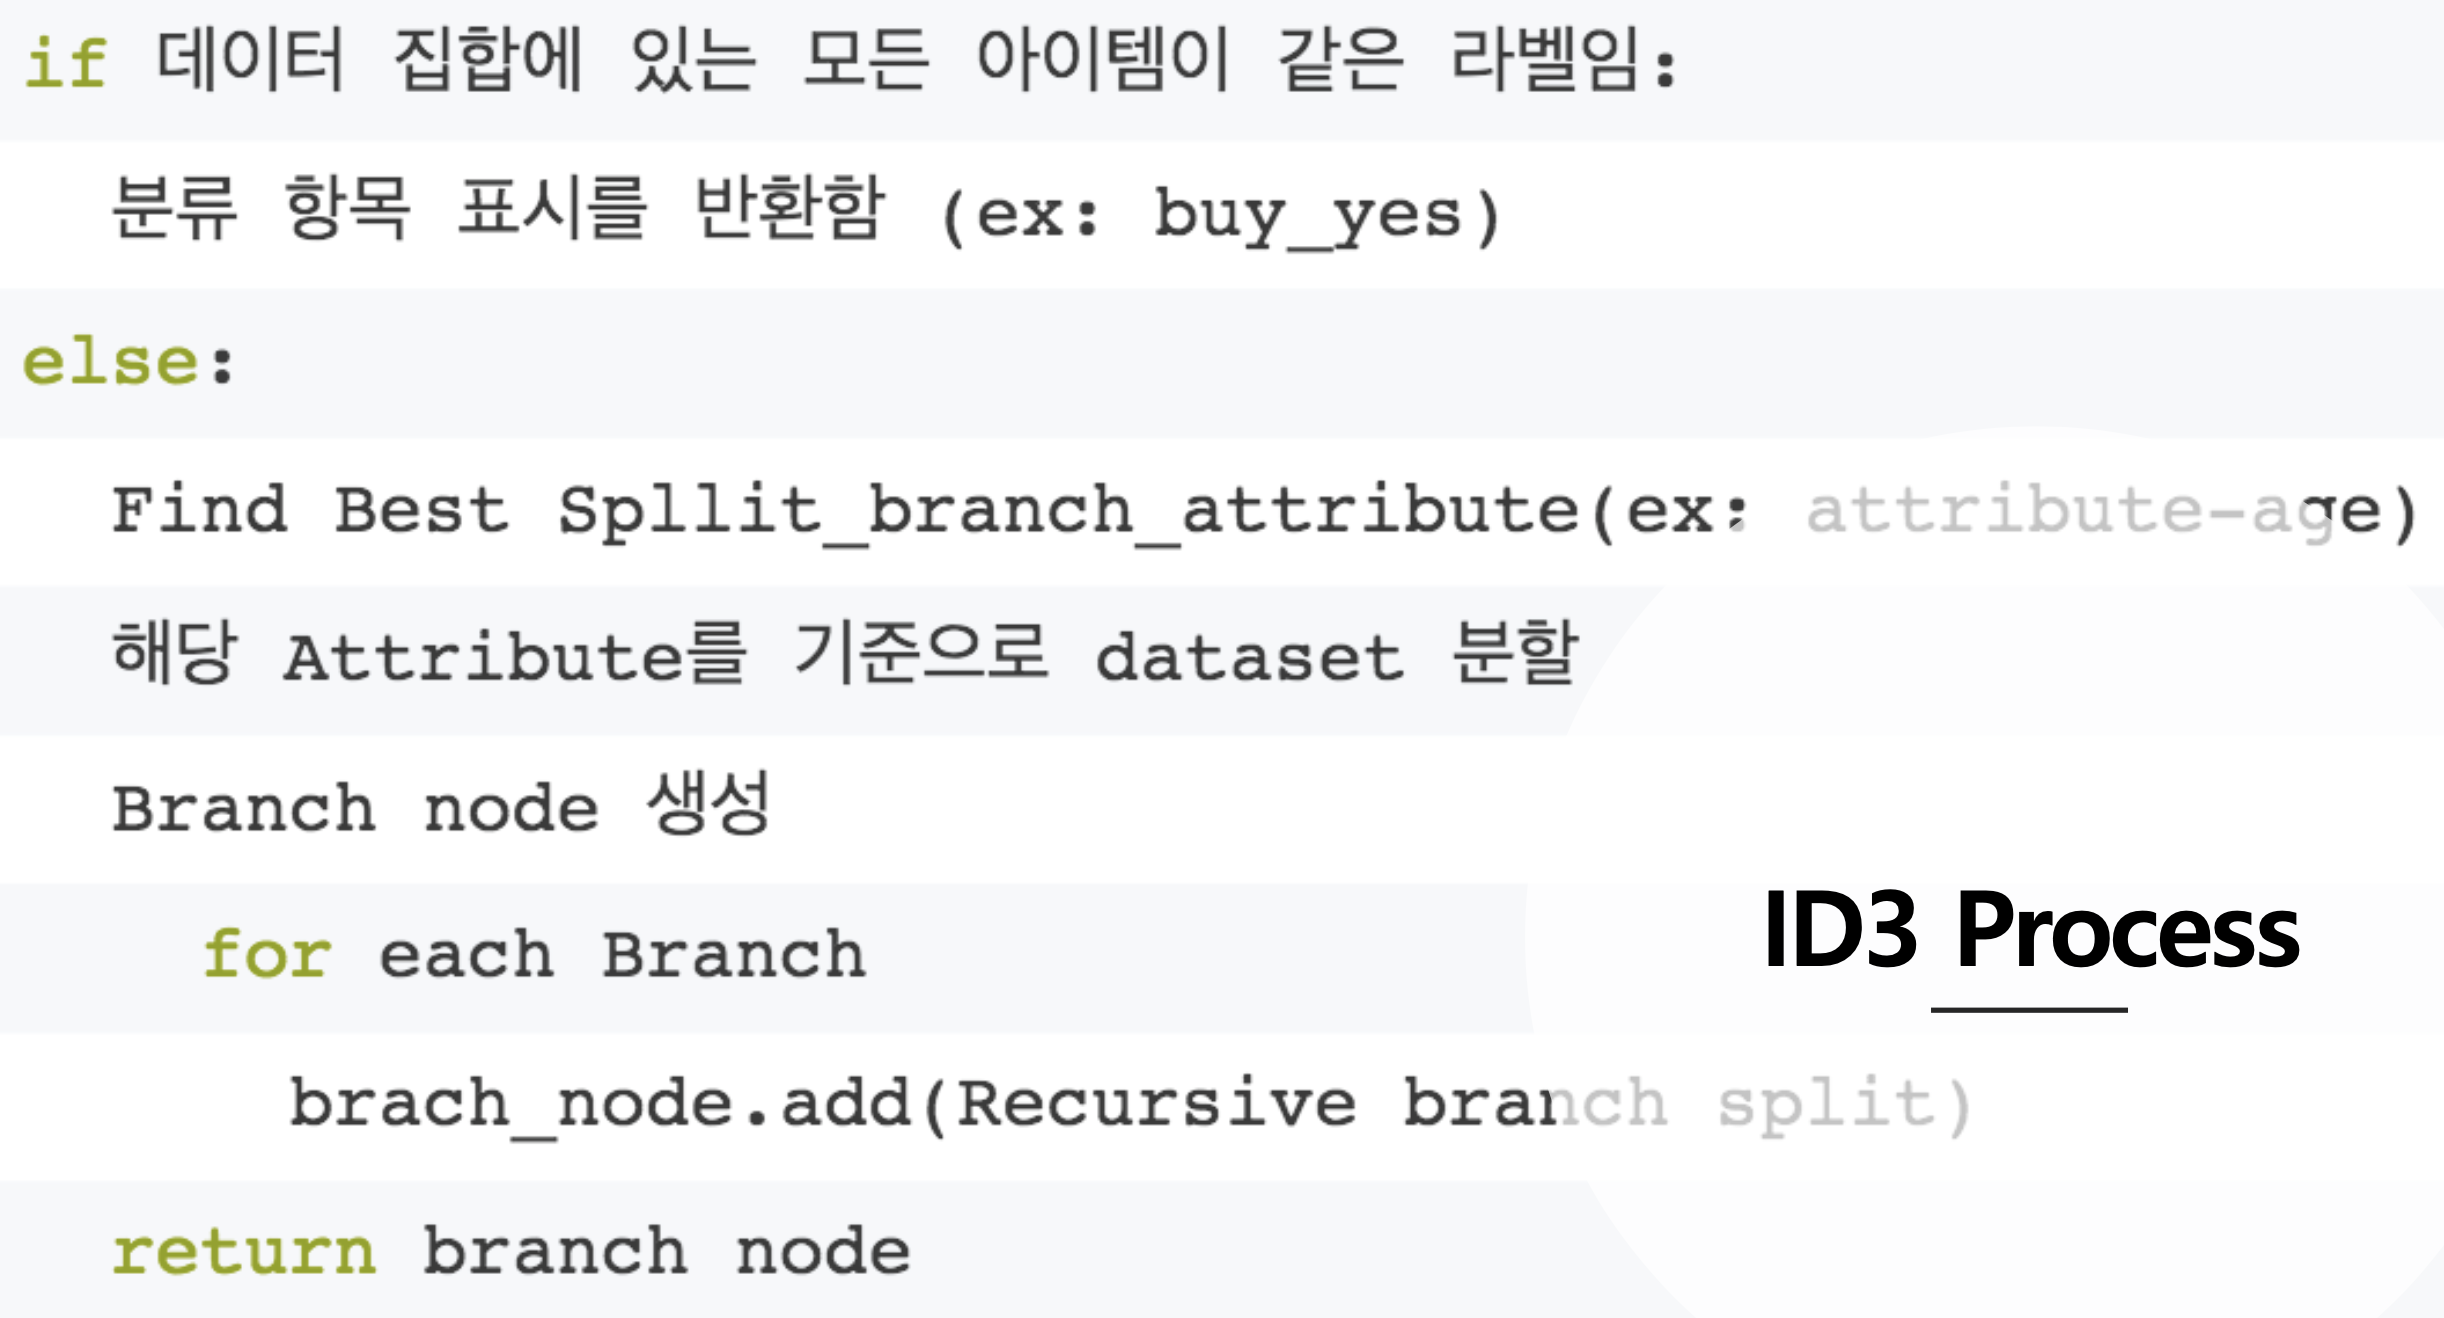
- 각각의 attribute는 Information Gain을 통해 가장 최적의 branch node를 선정
- 그렇게 나눠지고 남은 data를 Recursive(재귀적)하게 다시 나눠줌

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data = pd_data.drop("RID", axis = 1)   # 필요없는 column 삭제
pd_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [3]:
buy = pd_data.loc[pd_data['class_buys_computer'] == 'yes']       # 9개
not_buy = pd_data.loc[pd_data['class_buys_computer'] == 'no']    # 5개

### 전체 Entropy 구하기
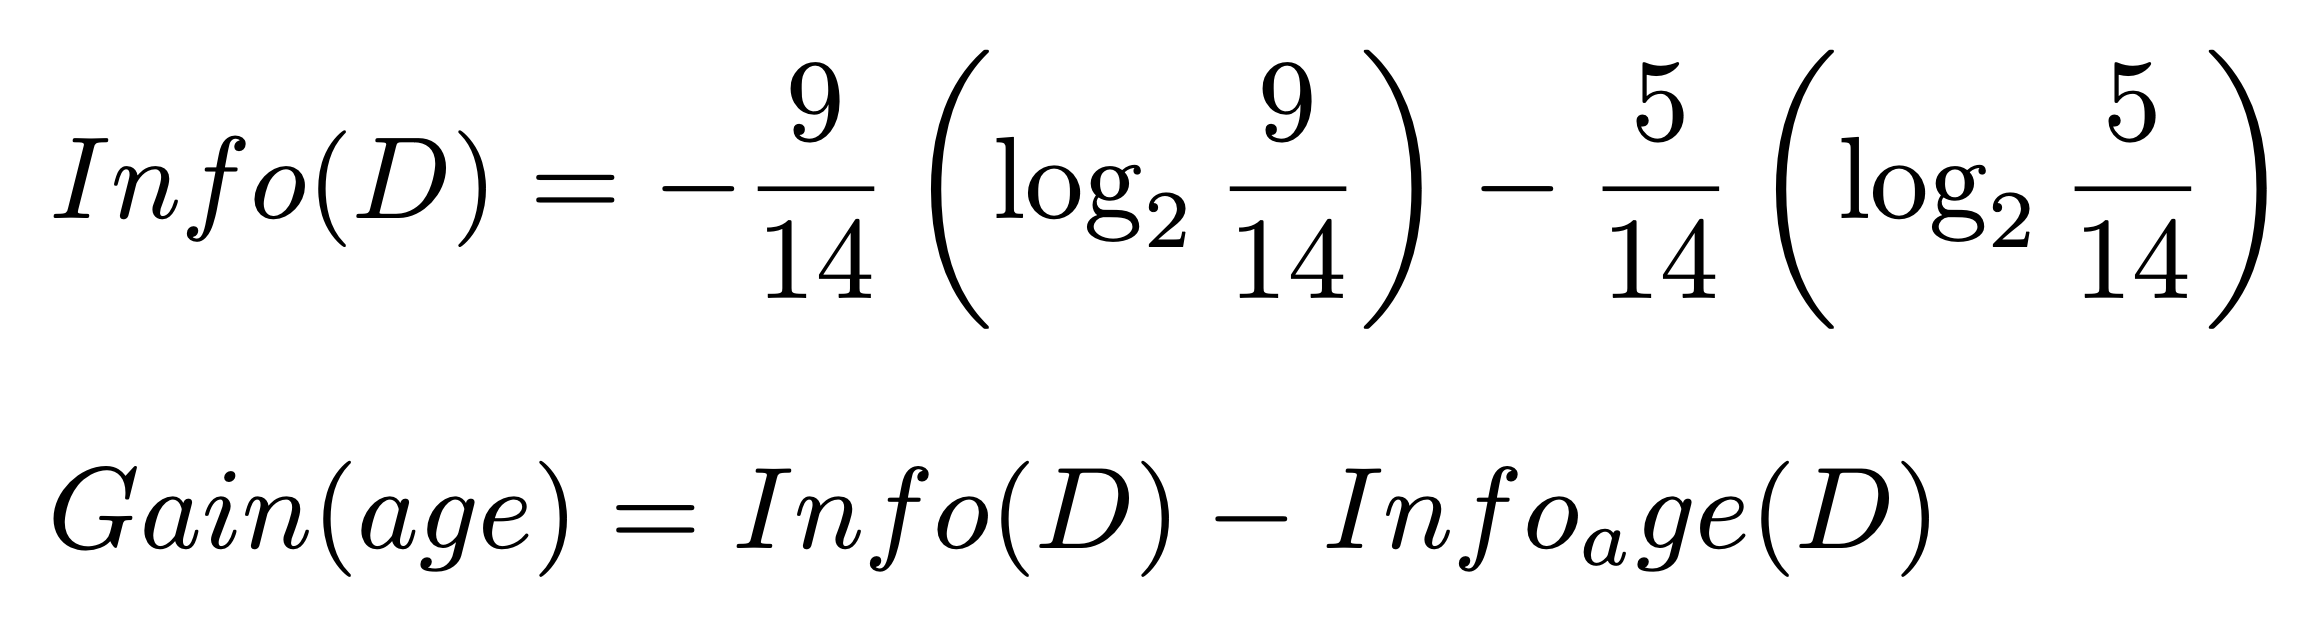

In [4]:
x = np.array([len(buy) / len(pd_data), len(not_buy) / len(pd_data)])
y = np.log2(x)

info_all = -sum(x * y)
info_all

0.9402859586706311

#### (ex) Age에 대한 Information Gain을 구하는 과정
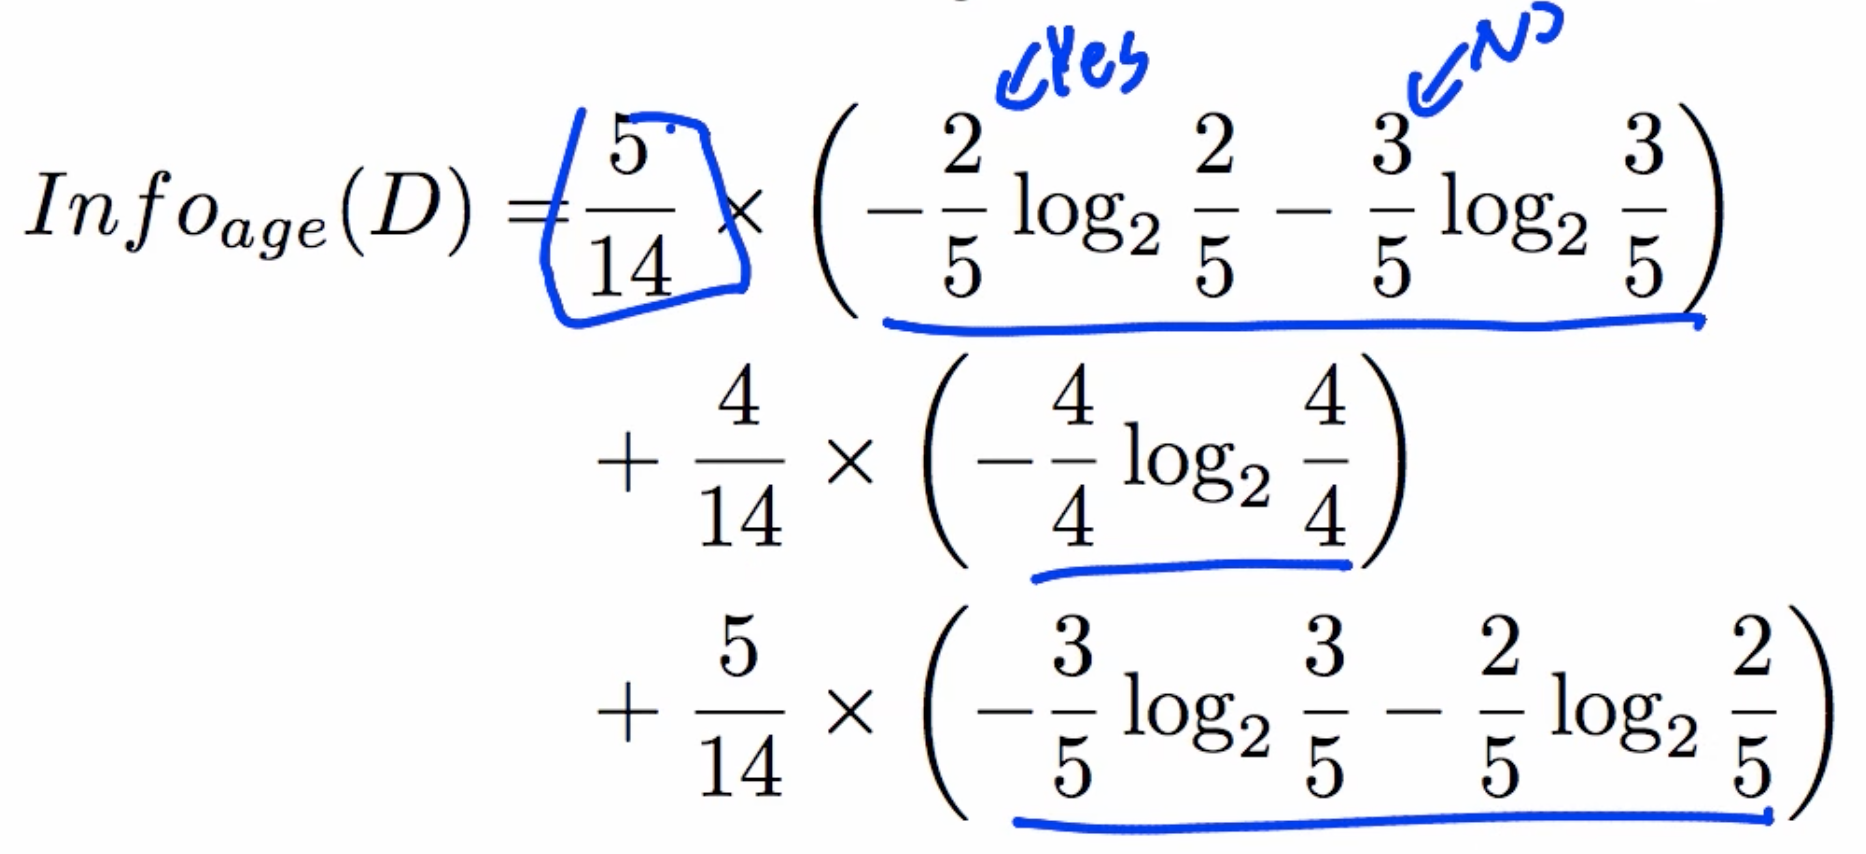

In [7]:
# 전체 Entropy 구하는 함수

def get_info(df):
    buy = df.loc[df['class_buys_computer'] == 'yes']
    not_buy = df.loc[df['class_buys_computer'] == 'no']
    x = np.array([len(buy) / len(df), len(not_buy) / len(df)])
    y = np.log2(x[x != 0])
    
    info_all = -sum(x[x != 0] * y)
    return info_all

In [8]:
# Info(D)

get_info(pd_data)

0.9402859586706311

In [9]:
youth = pd_data.loc[pd_data['age'] == 'youth']
senior = pd_data.loc[pd_data['age'] == 'senior']
middle_aged = pd_data.loc[pd_data['age'] == 'middle_aged']

In [10]:
# Info(D_youth)

get_info(youth)

0.9709505944546686

In [11]:
# Info(D_senior)

get_info(senior)

0.9709505944546686

In [12]:
# Info(D_middle_aged)

get_info(middle_aged)

-0.0

In [17]:
# Attribute별로 Entropy 구하는 함수

def get_attribute_info(df, attribute_name):
    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = pd_data.loc[pd_data[attribute_name] == value]
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))
    return sum(get_infos)

In [18]:
# Info_age(D)

get_attribute_info(pd_data, 'age')

0.6935361388961918

### Information Gain 구하기

In [19]:
# Gain(age)

get_info(pd_data) - get_attribute_info(pd_data, 'age')

0.24674981977443933

In [20]:
# Gain(income)

get_info(pd_data) - get_attribute_info(pd_data, 'income')

0.02922256565895487

In [21]:
# Gain(student)

get_info(pd_data) - get_attribute_info(pd_data, 'student')

0.15183550136234159

In [22]:
# Gain(credit_rating)

get_info(pd_data) - get_attribute_info(pd_data, 'credit_rating')

0.04812703040826949

### Gain(A)가 가장 높은 값 즉, 속성별 Entropy가 가장 낮은 속성 : "age"
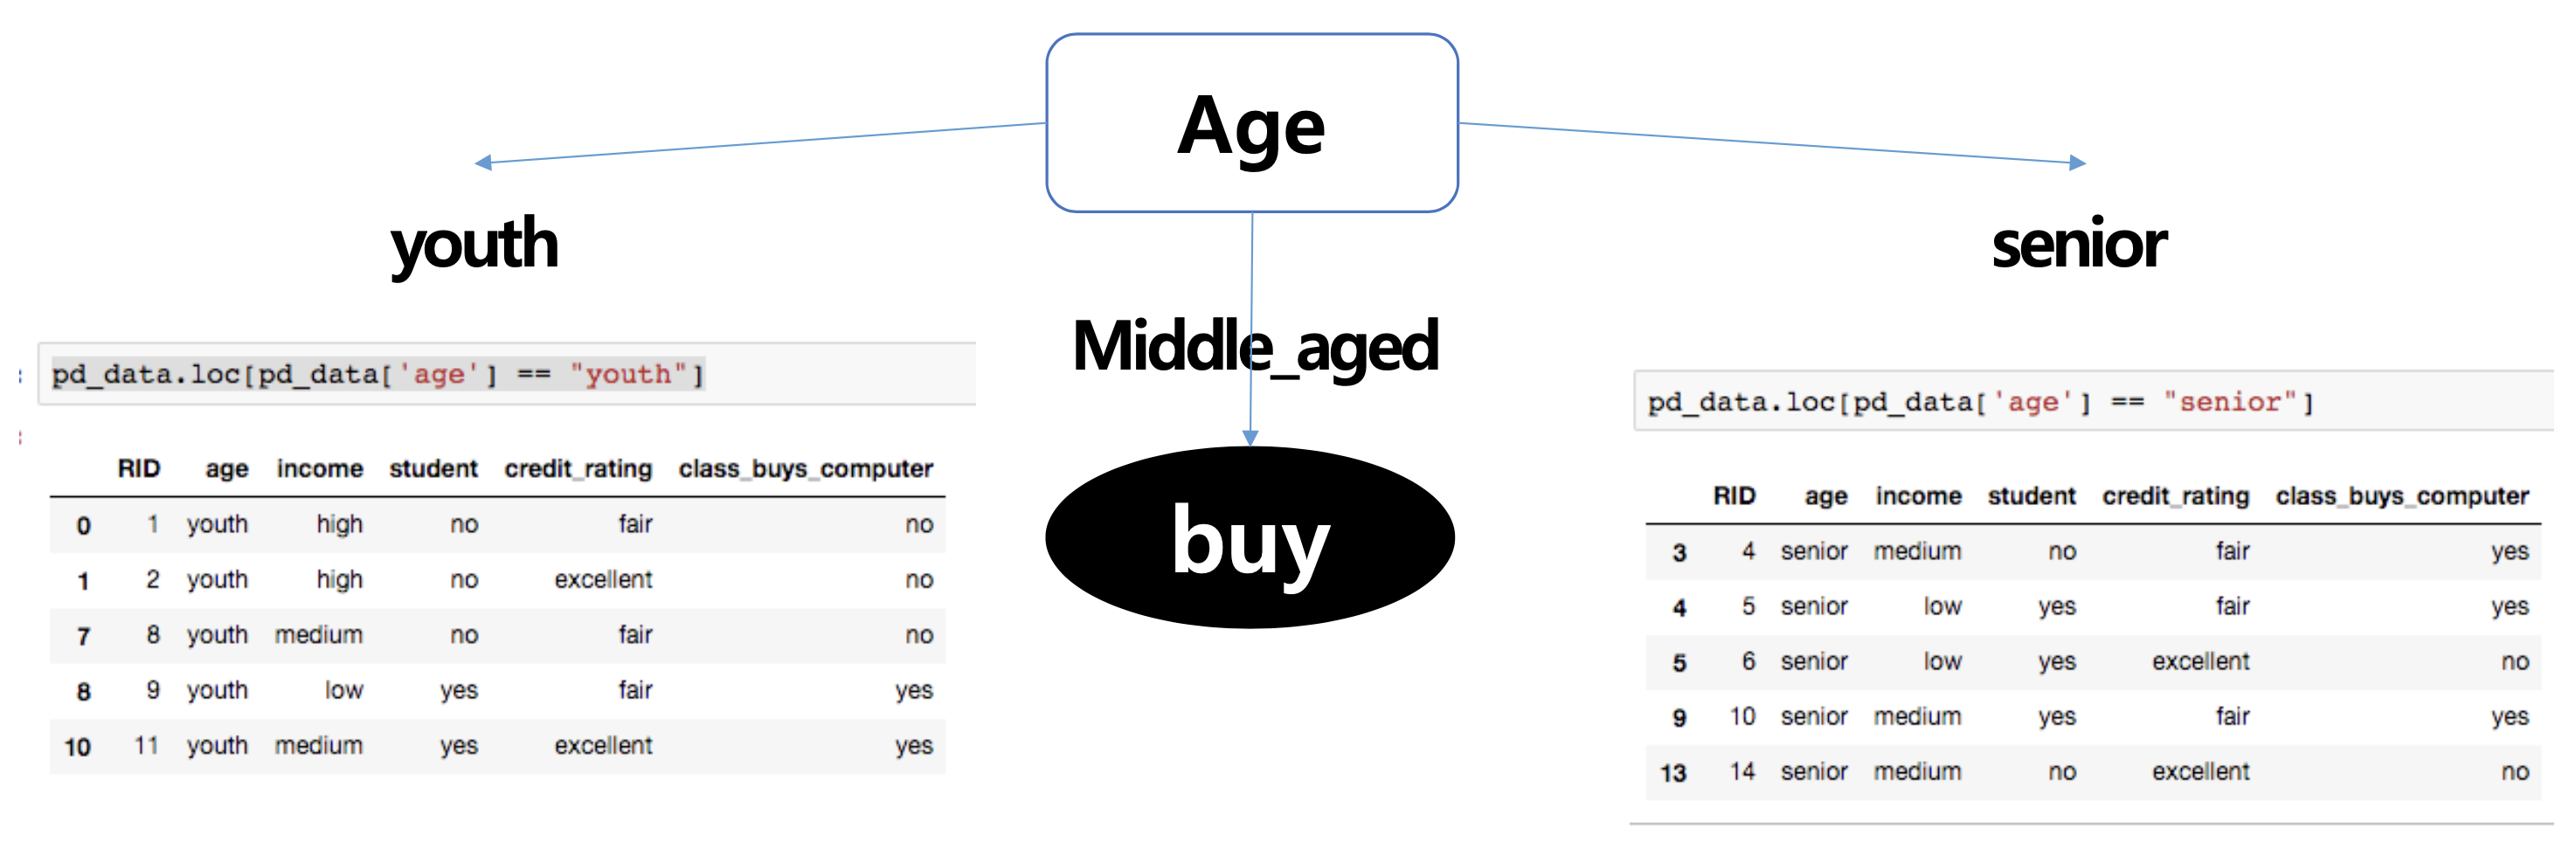

In [23]:
youth = pd_data.loc[pd_data['age'] == 'youth']

In [24]:
get_info(youth) - get_attribute_info(youth, 'income')

-1.580026905978025

In [25]:
get_info(youth) - get_attribute_info(youth, 'student')

-1.2367106860085422

In [26]:
get_info(youth) - get_attribute_info(youth, 'credit_rating')

-1.527094404679944

### youth일 때 Gain(A)가 가장 높은 속성 : "student"
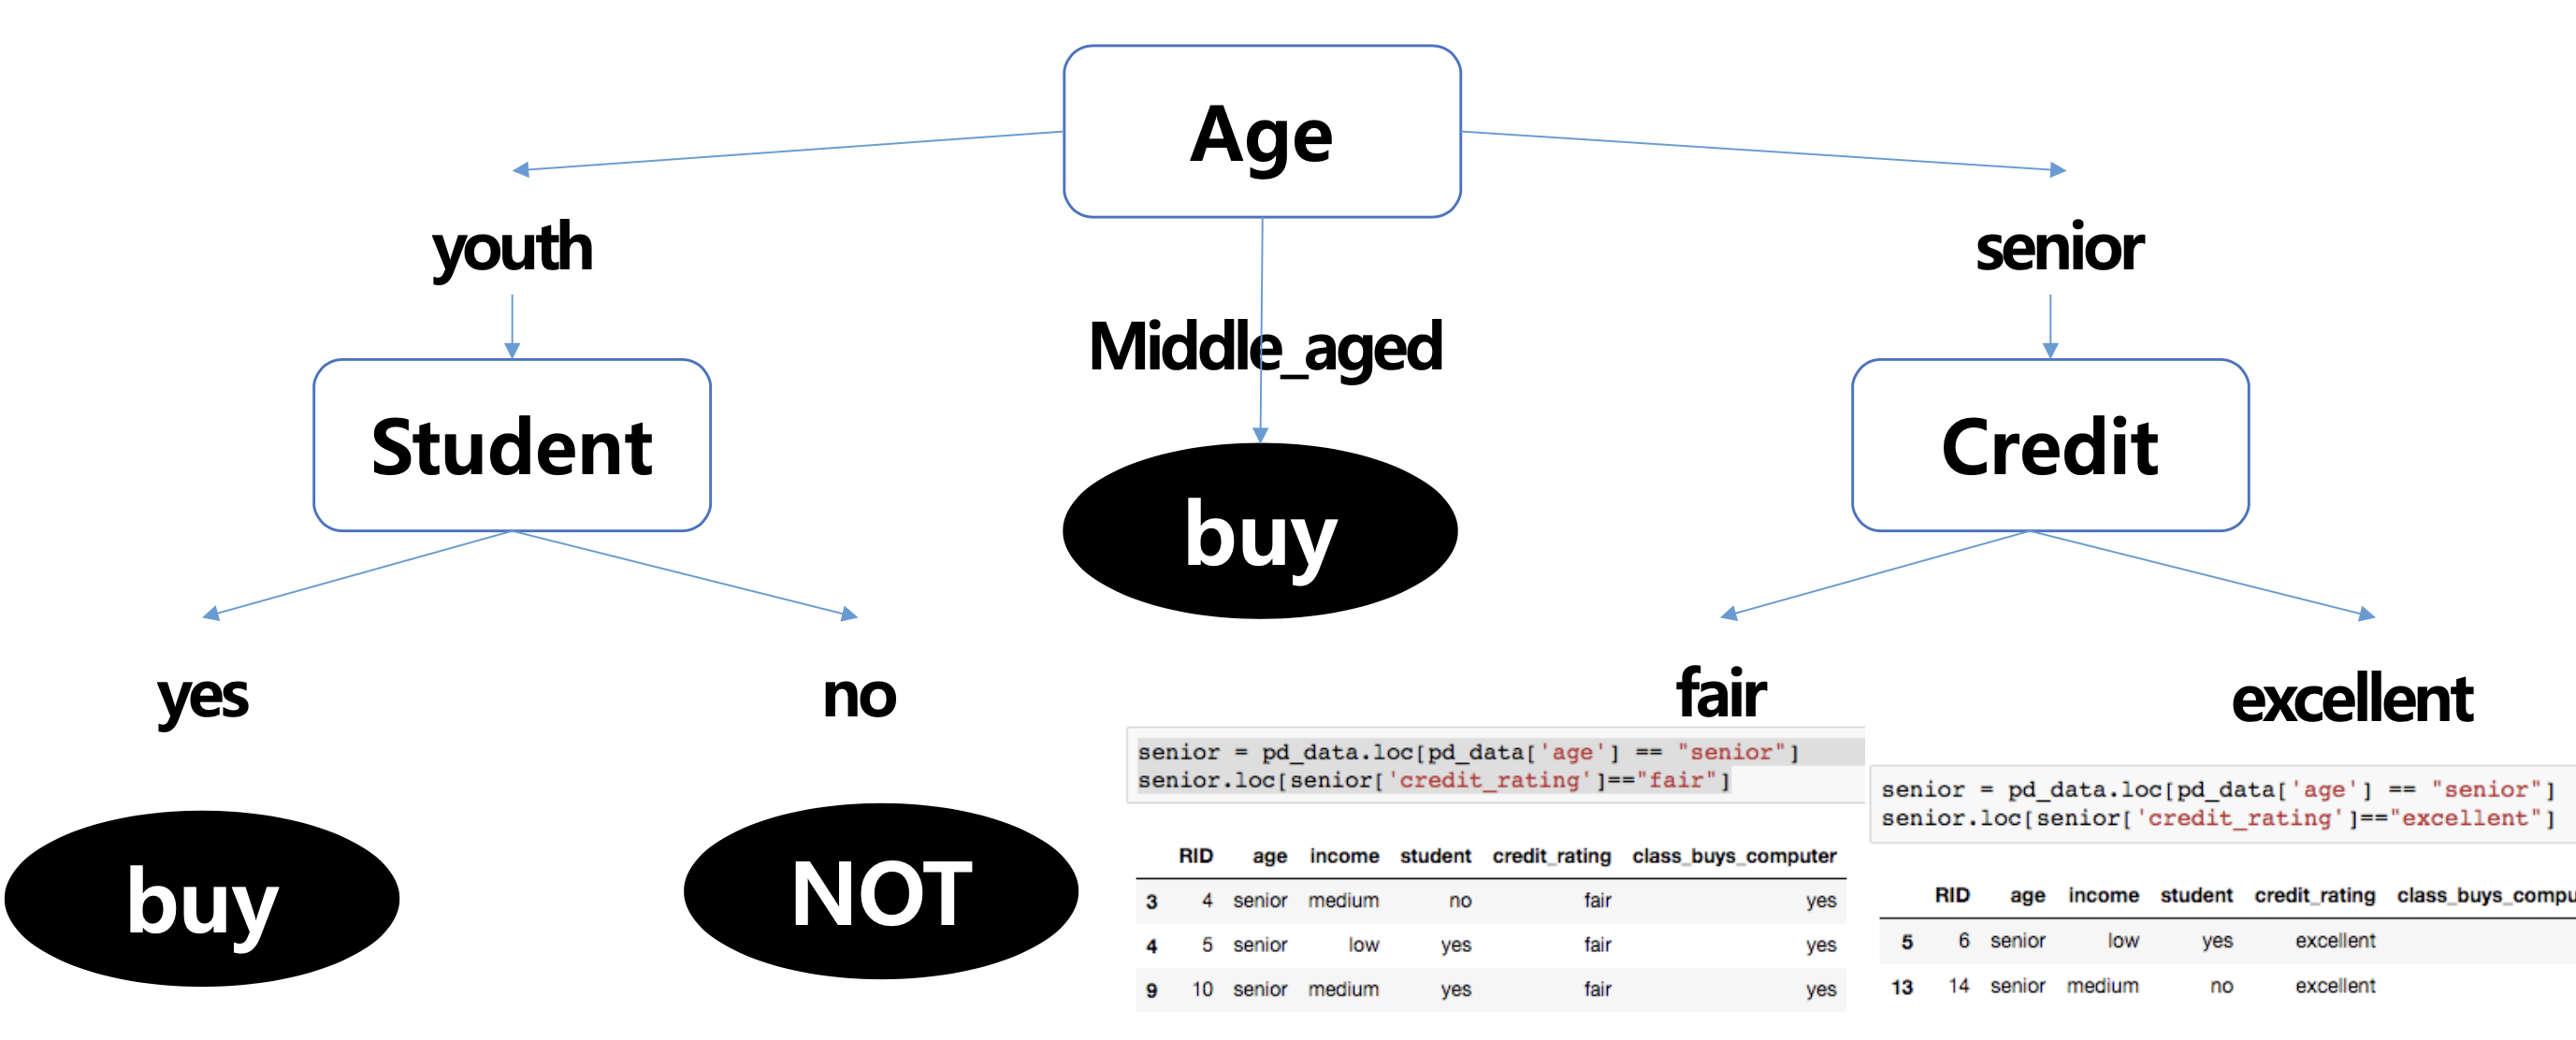